<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### k-Nearest Neighbors Detection With StandardScaler

### Anomaly detection using the kNN Algorithm, along with a data rescaling technique using the sci-kit learn's StandardScaler.

### Required Packages

In [ ]:
!pip install pyod
!pip install plotly

In [2]:
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [3]:
file_path= ''

List of features which are  required for model training .

In [4]:
#x_values
features = []

Target feature for prediction.

In [5]:
#y_value
target = ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [7]:
X=df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature set.


In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
x_train,x_test=train_test_split(X,test_size=0.2,random_state=123)

### Data Rescaling
Performing StandardScaler data rescaling operation on dataset. The StandardScaler standardize features by removing the mean and scaling to unit variance.

We will fit an object of StandardScaler to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

In [11]:
X_Scaled=StandardScaler().fit_transform(X)
X_Scaled=pd.DataFrame(data = X_Scaled,columns = X.columns)
X_Scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Model
#### k-Nearest Neighbors Detector (kNN)
kNN class for outlier detection. For an observation, its distance to its kth nearest neighbor could be viewed as the outlying score. It could be viewed as a way to measure the density. See [BAP02, BRRS00] for details.

Three kNN detectors are supported: largest: use the distance to the kth neighbor as the outlier score mean: use the average of all k neighbors as the outlier score median: use the median of the distance to k neighbors as the outlier score

 [For Reference:](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn)

In [12]:
# train kNN detector
model_name = 'KNN'
model = KNN()
model.fit(X_Scaled)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

### Anomaly Prediction

In [13]:
# get the prediction on the data
result=X_Scaled.copy(deep=True)
result['Anomaly']=model.predict(X_Scaled)
result.head()

,sepal_length,sepal_width,petal_length,petal_width,Anomaly
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


There are some spikes in distance measures, and these spikes are potentially anomalies or outliers in the dataset.
Now we can determine the cutoff value to filter anomalies

### Anomaly Visualization

#### Bar Plot

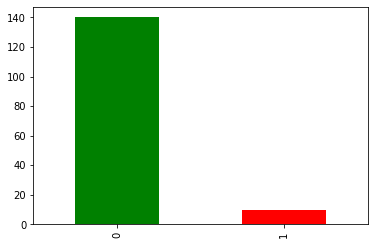

In [14]:
# visually determine cutoff values > 0.15
result['Anomaly'].value_counts().plot(kind='bar',color=['green','red'])

#### Pie Chart

In [15]:
fig = px.pie(result['Anomaly'],names=result['Anomaly'], title='Anomaly rate',)
fig.show()


#### Anomalies

In this part we will perform Dimensionality Reduction technique to visualize data. This can be performed using technique such as PCA or TSNE algorithms.

In [16]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(result.drop('Anomaly',axis=1))

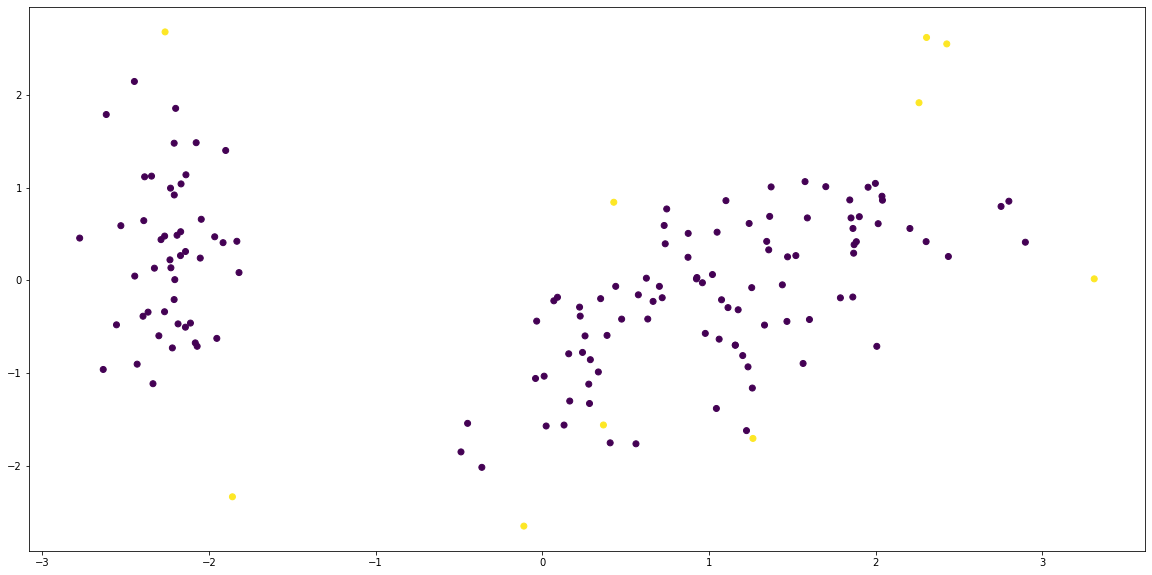

In [17]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=pca_results[:,0],y=pca_results[:,1],c=result.iloc[:,result.columns.get_loc('Anomaly')])
plt.show()

#### Creator: Ganapathi Thota , Github: [Profile](https://github.com/Shikiz)
